<a href="https://colab.research.google.com/github/HasithaGallella/EN3150-CNN-Assignment-03/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1

Epoch 1/20, Train Loss: 2.3041, Validation Loss: 2.3026
Epoch 2/20, Train Loss: 2.3026, Validation Loss: 2.3029
Epoch 3/20, Train Loss: 2.3027, Validation Loss: 2.3030
Epoch 4/20, Train Loss: 2.3021, Validation Loss: 2.3028
Epoch 5/20, Train Loss: 2.3010, Validation Loss: 2.3038
Epoch 6/20, Train Loss: 2.3003, Validation Loss: 2.3026
Epoch 7/20, Train Loss: 2.3007, Validation Loss: 2.3036
Epoch 8/20, Train Loss: 2.3020, Validation Loss: 2.3032
Epoch 9/20, Train Loss: 2.3010, Validation Loss: 2.3033
Epoch 10/20, Train Loss: 2.3003, Validation Loss: 2.3042
Epoch 11/20, Train Loss: 2.3007, Validation Loss: 2.3053
Epoch 12/20, Train Loss: 2.3003, Validation Loss: 2.3050
Epoch 13/20, Train Loss: 2.2981, Validation Loss: 2.3084
Epoch 14/20, Train Loss: 2.2980, Validation Loss: 2.3079
Epoch 15/20, Train Loss: 2.2967, Validation Loss: 2.3087
Epoch 16/20, Train Loss: 2.2995, Validation Loss: 2.3076
Epoch 17/20, Train Loss: 2.2965, Validation Loss: 2.3047
Epoch 18/20, Train Loss: 2.2955, Validat

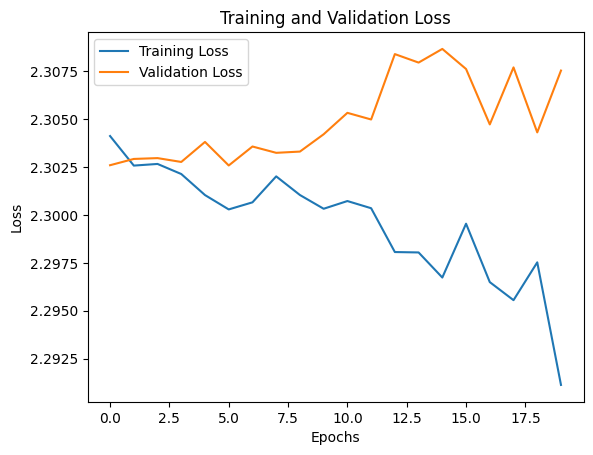

Test Accuracy: 9.50%


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, TensorDataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. Set up the environment (Ensure you have installed torch and torchvision)

# 2. Load your dataset (Replace this with your UCI dataset)
# Here, we simulate data loading
def load_data():
    # Simulate a dataset
    X = np.random.rand(1000, 3, 32, 32)  # 1000 samples, 3 channels (RGB), 32x32 images
    y = np.random.randint(0, 10, size=(1000,))  # 10 classes
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long)

X, y = load_data()
dataset = TensorDataset(X, y)

# 3. Split the dataset
train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 4. Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3)  # No activation_fn here
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 6 * 6, 128)  # Adjust size based on input image
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # Apply ReLU activation here
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))  # Apply ReLU activation here
        x = self.pool2(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))  # Apply ReLU activation here
        x = self.dropout(x)
        x = self.softmax(self.fc2(x))  # Apply softmax at the end
        return x





model = SimpleCNN(num_classes=10)

# 5. Train the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, val_loader, epochs=20):
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    return train_losses, val_losses

train_losses, val_losses = train_model(model, train_loader, val_loader)

# 6. Plot the losses
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# 7. Evaluate the model
def evaluate_model(model, test_loader):
    correct, total = 0, 0
    model.eval()
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

evaluate_model(model, test_loader)

2